In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import rando

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

# Load data

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


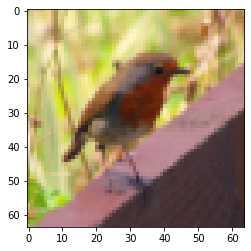

In [4]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)



# NN with any hidden layers
- Initialize the parameters
- Implement the forward propagation
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).
- Finally update the parameters.

<img src="images/final outline.png" style="width:800px;height:500px;">

**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients.

In [77]:
import numpy as np


class ActiveFunc:
    def sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        return A

    def sigmoid_backward(self, Z):
        A = self.sigmoid(Z)
        dZ = A*(1-A)
        assert(dZ.shape == Z.shape)
        return dZ

    def tanh(self, Z):
        A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
        return A

    def tanh_backward(self, Z):
        A = self.tanh(Z)
        dZ = 1 - np.power(A, 2)
        assert(dZ.shape == Z.shape)
        return dZ

    def relu(self, Z):
        A = np.maximum(0, Z)
        assert(A.shape == Z.shape)
        return A

    def relu_backward(self, Z):
        dZ = self.relu(Z)
        dZ[Z <= 0] = 0
        # dZ[Z > 0] = 1
        assert(dZ.shape == Z.shape)
        return dZ


class NNmodel(ActiveFunc):
    def __init__(self):
        pass

    def initialize_parameters(self, layer_dims):
        np.random.seed(1)  # setting the seed for receiving constant output
        parameters = {}
        for l in range(1, self.L + 1):
            parameters['W'+str(l)] = np.random.randn(layer_dims[l],
                                                     layer_dims[l-1])/np.sqrt(layer_dims[l-1])
            parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
            
            assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
            assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        return parameters

    def forward_propagation(self, X):
        self.caches = {
            ''
            'A0': X
        }
        for l in range(1, self.L + 1):
            
            
            W_L = self.parameters['W' + str(l)]
            b_L = self.parameters['b' + str(l)]
            Z_L = np.dot(W_L, self.caches['A'+str(l-1)]) + b_L
            
            
            if l == self.L:
                A_L = self.sigmoid(Z_L)
            else:
                A_L = self.sigmoid(Z_L)
            
            

            assert (A_L.shape == (W_L.shape[0], self.caches['A'+str(l-1)].shape[1]))
            
            self.caches['Z'+str(l)] = Z_L
            self.caches['A'+str(l)] = A_L

        return

    def backward_propagation(self, Y):
        
        L = self.L  # number of layers

        AL = self.caches['A'+str(L)]  # activation of the output layer

        # gradient of J with respected to A from output layer
        dA = - (np.divide(Y, AL) - np.divide(1-Y, 1 - AL))
        self.grads = {
            'dA'+str(L): dA
        }
        m = Y.shape[1]

        for l in range(L,0,-1):
            # output layer
            if l == L:
                dZ = self.grads['dA'+str(L)] * \
                    self.sigmoid_backward(self.caches['Z'+str(l)])

            # hidden layers
            else:
                dZ = self.grads['dA'+str(L)]*self.sigmoid_backward(self.caches['Z'+str(l)])

            dW = (1/m)*np.dot(dZ, self.caches['A'+str(l-1)].T)
            db = (1/m)*np.sum(dZ, axis=1, keepdims=True)
            dA_prev = np.dot(self.parameters['W'+str(l)].T, dZ)

            self.grads['dZ'+str(l)] = dZ
            self.grads['dW'+str(l)] = dW
            self.grads['db'+str(l)] = db
            self.grads['dA'+str(l-1)] = dA_prev

        return 

    def update_parameters(self, lr):
        
        for l in range(1, self.L+1):
            self.parameters['W'+str(l)] = self.parameters['W'+str(l)
                                                ] - lr * self.grads['dW'+str(l)]
            self.parameters['b'+str(l)] = self.parameters['b'+str(l)
                                                ] - lr * self.grads['db'+str(l)]

        return 

    def compute_cost(self, Y):
        A = self.caches['A'+str(self.L)]
        m = Y.shape[1]
        cost = - (np.dot(np.log(A), Y.T) + np.dot(np.log(1-A), (1-Y).T)) / m

        cost = np.squeeze(cost)
        assert (cost.shape == ())

        return cost

    def predict(self, X):
        self.forward_propagation(X)
        predictions = np.round(self.caches['A'+str(self.L)])
        return predictions

    def compute_accuracy(self, X, Y):
        predictions = self.predict(X)
        accuracy = np.squeeze(100.0 - np.mean(np.abs(predictions - Y))*100)
        return accuracy

    def fit(self, X, Y, layer_dims, lr=0.01, iters=2000, printCost=False):
        '''
        X: input have shape (n_x, m) with m is the number of training example
        Y: output have shape (n_y, m)
        layer_dims: dimenssion of each layer from left to right respectively. Assuming the first and the last element is n_x and n_y
        lr: learning rate for adjust the speed for training model
        iters: number of iteration for training model
        printCost: set True if you want to see the cost
        -------------------------------------------------
        '''
        # number of layers in our network
        self.L = len(layer_dims)-1  # do not count the input layer
        np.random.seed(1)
        # store the parameters W, b
        self.parameters = self.initialize_parameters(layer_dims)

        self.costs = list()
        for i in range(iters):
            self.forward_propagation(X)
            
            cost = self.compute_cost(Y)
            self.costs.append(cost)
            
            self.backward_propagation(Y)
            self.update_parameters(lr)
            if i % 1000 == 0 and printCost:
                print("Cost after {} iterations: {}".format(i, cost))


In [78]:
m1 = NNmodel()

In [84]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
m1.fit(train_x, train_y, layer_dims, lr=0.01, iters=20000, printCost=True)

Cost after 0 iterations: 0.9085338182021664
Cost after 100 iterations: 0.7182719430344903
Cost after 200 iterations: 0.6702631380711566
Cost after 300 iterations: 0.6546632334034909
Cost after 400 iterations: 0.6486840417028236
Cost after 500 iterations: 0.6461718325130388
Cost after 600 iterations: 0.6450742748961887
Cost after 700 iterations: 0.6453993262196266
Cost after 800 iterations: 0.6416962704031526
Cost after 900 iterations: 0.6296346915670978
Cost after 1000 iterations: 0.6174728501100162
Cost after 1100 iterations: 0.6046128217497123
Cost after 1200 iterations: 0.5934132336585521
Cost after 1300 iterations: 0.5811080202517278
Cost after 1400 iterations: 0.5679697609443461
Cost after 1500 iterations: 0.5542352879942641
Cost after 1600 iterations: 0.5397732064747357
Cost after 1700 iterations: 0.5246368425448251
Cost after 1800 iterations: 0.5090112240312356
Cost after 1900 iterations: 0.49313717381033406
Cost after 2000 iterations: 0.47726047256236603
Cost after 2100 iterati

Cost after 17100 iterations: 0.06728591986483544
Cost after 17200 iterations: 0.06686563735324035
Cost after 17300 iterations: 0.06645364319377753
Cost after 17400 iterations: 0.0660497217861812
Cost after 17500 iterations: 0.06565366069722872
Cost after 17600 iterations: 0.06526525024697645
Cost after 17700 iterations: 0.06488428038896536
Cost after 17800 iterations: 0.06451052876811722
Cost after 17900 iterations: 0.06414374358592459
Cost after 18000 iterations: 0.06378413682167845
Cost after 18100 iterations: 0.06343271587564452
Cost after 18200 iterations: 0.06308773327318341
Cost after 18300 iterations: 0.06274825974969256
Cost after 18400 iterations: 0.062414515494687364
Cost after 18500 iterations: 0.062086558756305185
Cost after 18600 iterations: 0.061764329962298095
Cost after 18700 iterations: 0.06144772463418112
Cost after 18800 iterations: 0.061136621021151846
Cost after 18900 iterations: 0.06083089135584753
Cost after 19000 iterations: 0.06053040701467301
Cost after 19100 

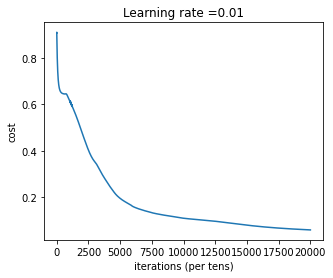

In [86]:
plt.plot(np.squeeze(m1.costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(0.01))
plt.show()

In [87]:
m1.compute_accuracy(train_x, train_y)

98.08612440191388

**the result is not good because the size of training set is quite of small**

In [88]:
m1.compute_accuracy(test_x, test_y)

64.0